In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "StudentsPerformance.csv" with length 72036 bytes


In [ ]:
import io

In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['StudentsPerformance.csv']))
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Adding a column for the total marks.
data['total_marks']=data['math score']+data['reading score']+data['writing score']
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


**Feature Classification** <br>
It is good practice to categorize the numerical and categorical variables. <br>
We use histograms to observe how the scores of students are distributed.

In [ ]:
data_numerical = data[['math score','reading score','writing score','total_marks']]
data_categorical=data[['gender','race/ethnicity','parental level of education','lunch','test preparation course']]

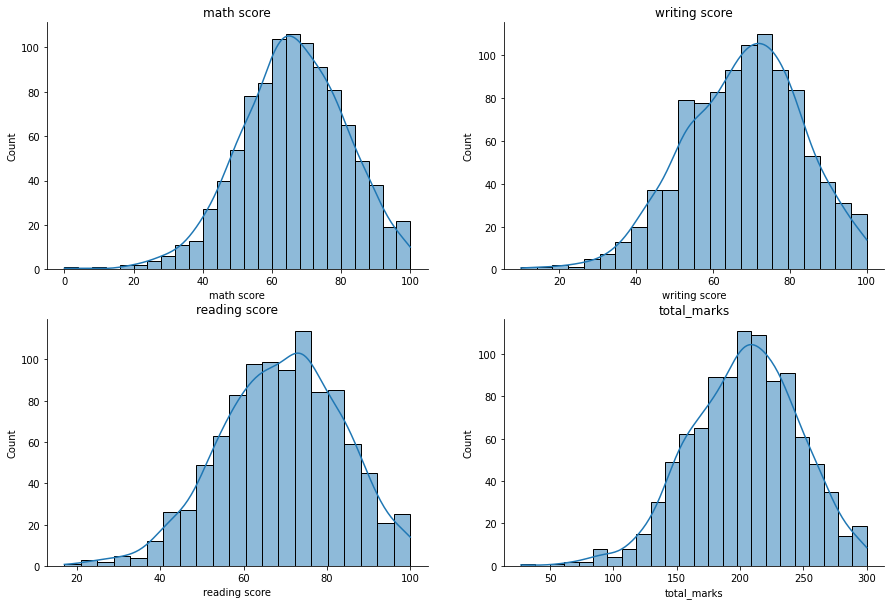

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(15,10))
for i,idx in enumerate(data_numerical.columns):
    sns.histplot(ax=ax[i%2,i//2],data=data_numerical[idx],kde=True)
    ax[i%2,i//2].set_title(idx)

We can see that our numerical data follows the normal distribution.

**KDE plot**

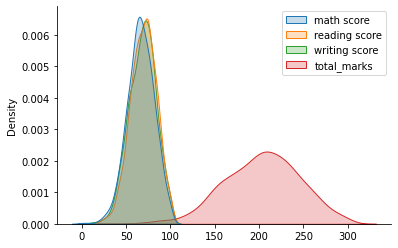

In [ ]:
sns.kdeplot(data=data_numerical,shade=True)

In [ ]:
# Skewness and kurtosis
s_k=[]
for i in data_numerical.columns:
    s_k.append([i,data_numerical[i].skew(),data_numerical[i].kurt()])
skew_kurt=pd.DataFrame(s_k,columns=['Columns','Skewness','Kurtosis'])
skew_kurt

,Columns,Skewness,Kurtosis
0,math score,-0.278935,0.274964
1,reading score,-0.259105,-0.068265
2,writing score,-0.289444,-0.033365
3,total_marks,-0.299057,0.125843


As a general rule of thumb: If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric

**Scatterplots for the numerical variables**

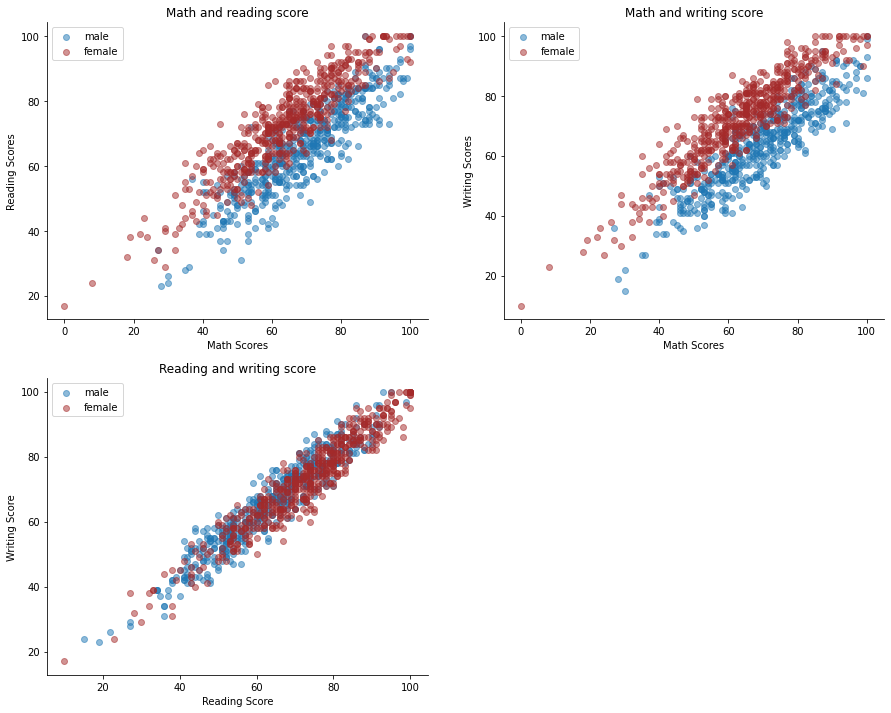

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(15,12))

#Math and reading scores
ax[0,0].scatter(x='math score',y='reading score',data=data[data['gender']=='male'],alpha=0.5,label='male')
ax[0,0].scatter(x='math score',y='reading score',data=data[data['gender']=='female'],alpha=0.5,label='female',color='brown')
ax[0,0].set_xlabel('Math Scores')
ax[0,0].set_ylabel('Reading Scores')
ax[0,0].set_title('Math and reading score')
ax[0,0].legend()

# Mathematics and Writing Scores
ax[0,1].scatter(x='math score',y='writing score',data=data[data['gender']=='male'],alpha=0.5,label='male')
ax[0,1].scatter(x='math score',y='writing score',data=data[data['gender']=='female'],alpha=0.5,label='female',color='brown')
ax[0,1].set_xlabel('Math Scores')
ax[0,1].set_ylabel('Writing Scores')
ax[0,1].set_title('Math and writing score')
ax[0,1].legend()
# Reading and writing Scores
ax[1,0].scatter(x='writing score',y='reading score',data=data[data['gender']=='male'],alpha=0.5,label='male')
ax[1,0].scatter(x='writing score',y='reading score',data=data[data['gender']=='female'],alpha=0.5,label='female',color='brown')
ax[1,0].set_xlabel('Reading Score')
ax[1,0].set_ylabel('Writing Score')
ax[1,0].set_title('Reading and writing score')
ax[1,0].legend()
ax[1,1].set_visible(False)

We can see from the above figure that :

1. Most of the scores fall between 40-100 range. <br>
2. Only a small portion of students scored less than 40. <br>
3. The scores increases linearly with each other.

**Group with most number of people**

Text(0.5, 1.0, 'Number of people in different groups')

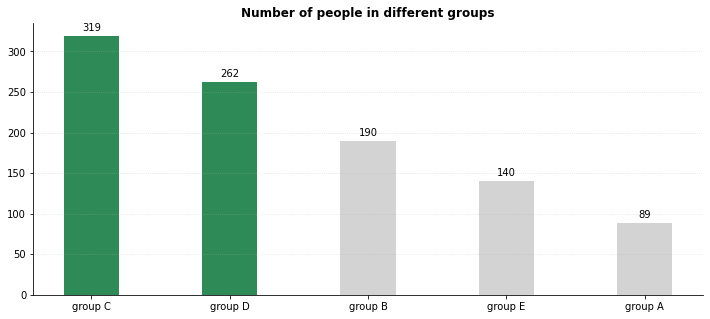

In [ ]:
color_map = ['lightgrey' for _ in range(5)]
color_map[0] =color_map[1]='seagreen'
fig,ax = plt.subplots(1,1,figsize=(12,5))
data_group = data['race/ethnicity'].value_counts().sort_values(ascending=False)
ax.bar( data_group.index, data_group , width=0.4,color=color_map )
ax.grid(linestyle=':',axis='y',alpha=0.4)
for an in data_group.index:
    ax.annotate(data_group[an],xy=(an,data_group[an]+10),va='center',ha='center')
for i in ['top','right']:
    ax.spines[i].set_visible(False)
plt.title('Number of people in different groups',fontweight='bold')

Group C has the most number of people and Group A has the least amount of people.

**Categorical Scatterplots**

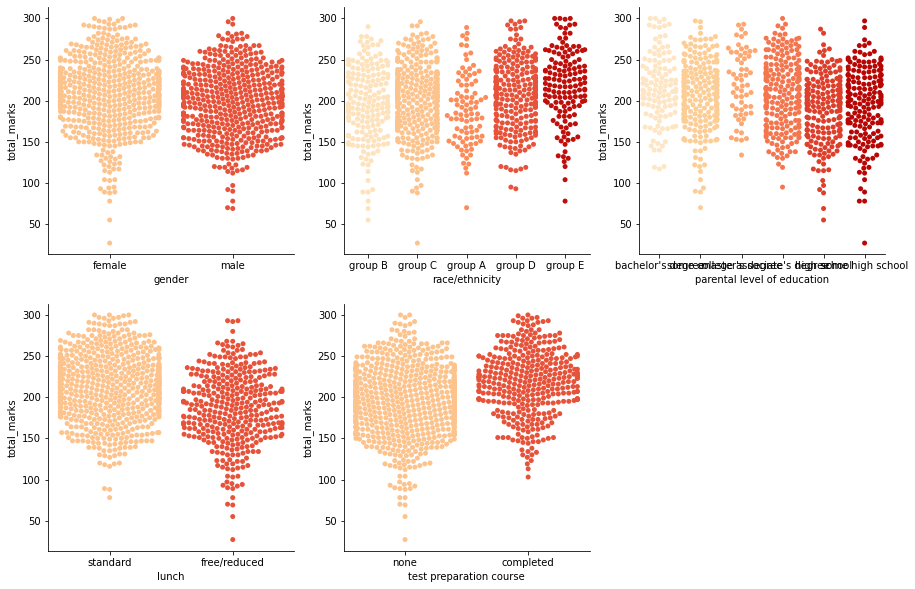

In [ ]:
plt.figure(figsize=(15,10))
for indx,val in enumerate(data_categorical.columns):
    plt.subplot(2,3,indx+1)
    sns.swarmplot(x=data_categorical[val],y=data_numerical['total_marks'],palette='OrRd')

As we cannot see the parental level of education clearly , I will plot it again.

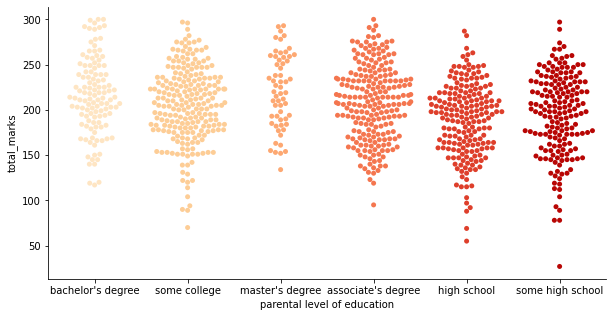

In [ ]:
plt.figure(figsize=(10,5))
sns.swarmplot(x=data_categorical['parental level of education'],y=data_numerical['total_marks'],palette='OrRd')

We can observe from the above graphs that most of the students score above 150 marks.

**Education level of Parents**

Text(0.5, 1.0, 'Education Level of Parents')

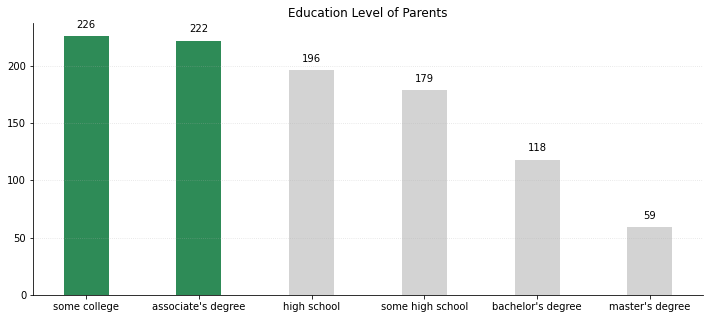

In [ ]:
color_map = ['lightgrey' for _ in range(6)]
color_map[0] =color_map[1]='seagreen'
fig,ax = plt.subplots(1,1,figsize=(12,5))
data_group = data['parental level of education'].value_counts().sort_values(ascending=False)
ax.bar( data_group.index, data_group , width=0.4,color=color_map)
ax.grid(linestyle=':',axis='y',alpha=0.4)
for an in data_group.index:
    ax.annotate(data_group[an],xy=(an,data_group[an]+10),va='center',ha='center')
for i in ['top','right']:
    ax.spines[i].set_visible(False)
plt.title('Education Level of Parents')

Most of the parents attended some college(226) and almost the same amount of people have an associate's degree. Parents who hold a master's degree are very few in number.

**Gender , Lunch and Test preperation**


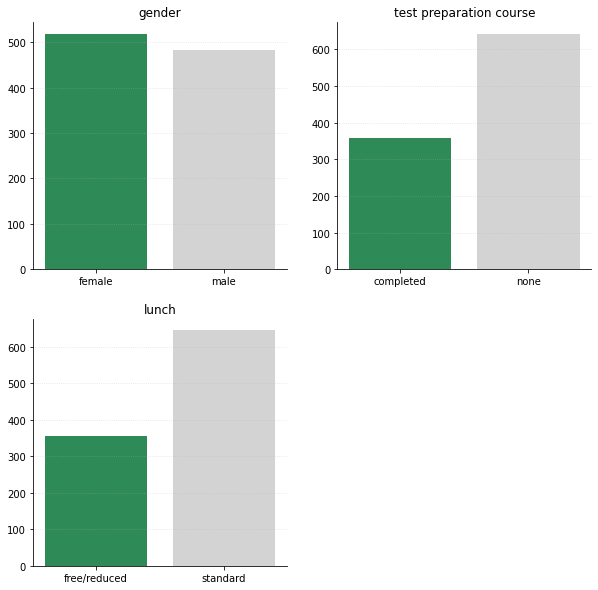

In [ ]:
data1=data[['gender','lunch','test preparation course']]
fig,ax=plt.subplots(2,2,figsize=(10,10))
color_map = ['lightgrey' for _ in range(2)]
color_map[0] ='seagreen' #color highlight
for i,idx in enumerate(data1.columns):
    z=data1[idx].value_counts().sort_index()
    ax[i%2][i//2].bar(z.index,z , color=color_map)
    ax[i%2][i//2].set_title(idx)  
    ax[i%2][i//2].grid(linestyle=':',axis='y',alpha=0.4)  
    
ax[1][1].set_visible(False)

We can observe from the above figures that:

1. Females students are more than male students. <br>
2. The students who have completed any course are less than the students who did not prepare. <br>
3. Students who prefer standard lunch are more in number than students who prefer free/reduced lunch.

**The group of people who scored the highest number of total marks**

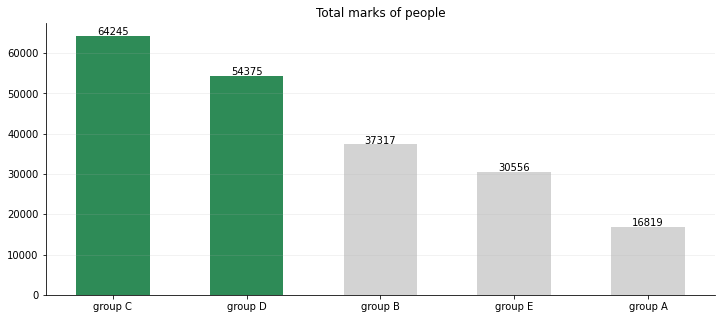

In [ ]:
highest_group = data.groupby(by='race/ethnicity')['total_marks'].sum().sort_values(ascending=False).reset_index()
color_map = ['lightgrey' for _ in range(5)]
color_map[0] =color_map[1]='seagreen' #color highlight
fig,ax = plt.subplots(1,1,figsize=(12,5))
ax.bar(highest_group['race/ethnicity'],highest_group['total_marks'],color=color_map,width=0.55,linewidth=0.7)
for an in highest_group.index:
    ax.annotate(highest_group['total_marks'][an],xy=(highest_group['race/ethnicity'][an],highest_group['total_marks'][an]+1000),va='center',ha='center')
for i in ['top','right']:
    ax.spines[i].set_visible(False)
plt.title('Total marks of people')
ax.grid(axis='y',linestyle='-',alpha=0.2)

The students in Group C scored the most number of marks among all the groups followed by groups D,B,E and group A

**Parents educational levels and students performance**

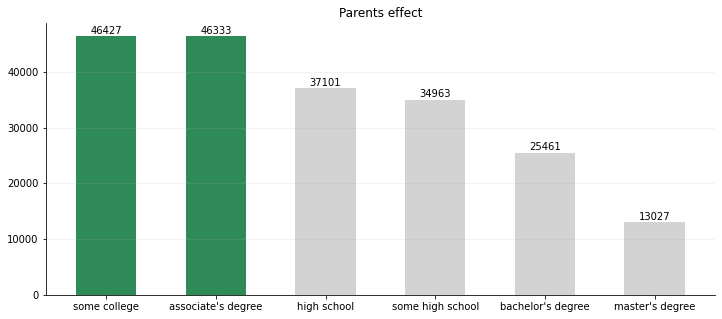

In [ ]:
parents= data.groupby(by='parental level of education')['total_marks'].sum().sort_values(ascending=False).reset_index()
color_map = ['lightgrey' for _ in range(6)]
color_map[0] =color_map[1]='seagreen' #color highlight
fig,ax = plt.subplots(1,1,figsize=(12,5))
ax.bar(parents['parental level of education'],parents['total_marks'],color=color_map,width=0.55,linewidth=0.7)
for an in parents.index:
    ax.annotate(parents['total_marks'][an],xy=(parents['parental level of education'][an],parents['total_marks'][an]+1000),va='center',ha='center')
for i in ['top','right']:
    ax.spines[i].set_visible(False)
plt.title('Parents effect')
ax.grid(axis='y',linestyle='-',alpha=0.2)

**How does gender effect the students performance individually**

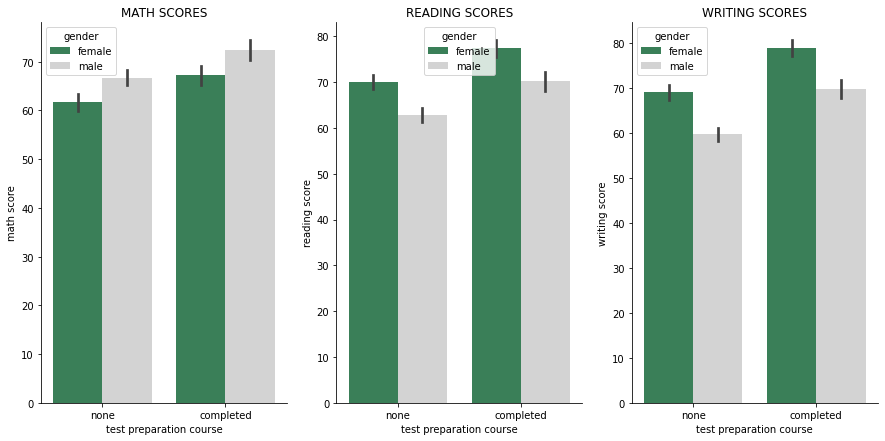

In [ ]:
plt.figure(figsize=(15,7))
color_map = ['lightgrey' for _ in range(6)]
color_map[0] ='seagreen' #color highlight
plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course',y='math score',data=data,hue='gender',palette=color_map)
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',data=data,hue='gender',palette=color_map)
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',data=data,hue='gender',palette=color_map)
plt.title('WRITING SCORES')
plt.show()

In [ ]:
# Number of students who passed in math
data['maths_passed']= data['math score'].apply(lambda x : 'P' if x>40 else 'F')
data['maths_passed'].value_counts()

P    950
F     50
Name: maths_passed, dtype: int64

In [ ]:
# Number of students who passed in reading
data['reading_passed'] = data['reading score'].apply(lambda x: 'P' if x>40 else 'F')
data['reading_passed'].value_counts()

P    973
F     27
Name: reading_passed, dtype: int64

In [ ]:
# Number of students who passed in writing.
data['writing_passed']=data['writing score'].apply(lambda x: 'P' if x>40 else 'F')
data['writing_passed'].value_counts()

P    965
F     35
Name: writing_passed, dtype: int64

**Which subject has the most number of failures?**

Text(0.5, 1.0, 'Students who passed in writing')

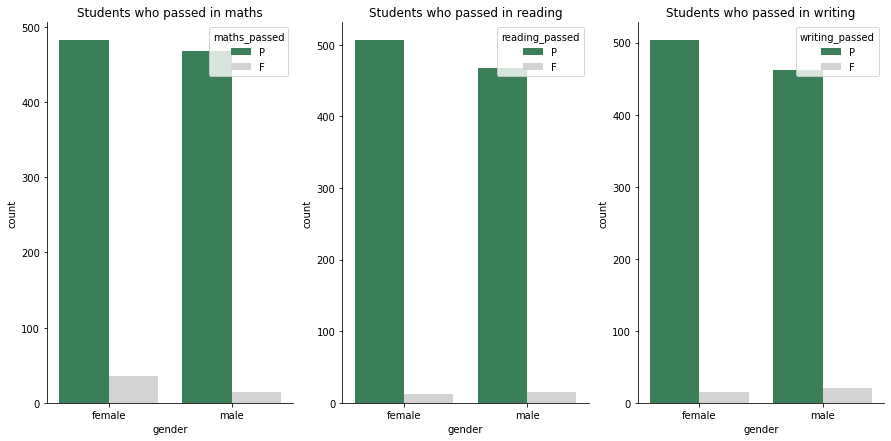

In [ ]:
plt.subplots(1,3,figsize=(15,7))
plt.subplot(1,3,1)
sns.countplot(x='gender',data=data,hue='maths_passed',palette=color_map)
plt.title('Students who passed in maths')
plt.subplot(1,3,2)
sns.countplot(x='gender',data=data,hue='reading_passed',palette=color_map)
plt.title('Students who passed in reading')
plt.subplot(1,3,3)
sns.countplot(x='gender',data=data,hue='writing_passed',palette=color_map)
plt.title('Students who passed in writing')

1. The number of people who failed in mathematics are more than other subjects. <br>
2. Overall the number of students who failed are significantly less than the students who passed.

In [ ]:
# Students percentage
data['Percentage']=data['total_marks']/3  # Percentage = number/100, here the highest marks =300. So,dividing by 3 gives the % .

**Grading the Students**

In [ ]:
data['OverAll_PassStatus'] = data.apply(lambda x : 'F' if x['maths_passed'] == 'F' or 
                                    x['reading_passed'] == 'F' or x['writing_passed'] == 'F' else 'P', axis =1)

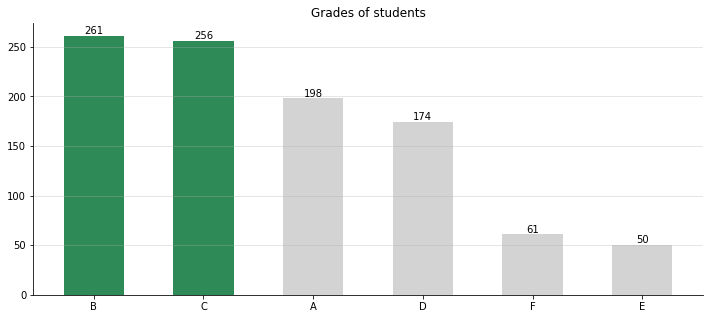

In [ ]:
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'

data['Grade'] = data.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)
color_map[0] =color_map[1]='seagreen'
grades=data['Grade'].value_counts().sort_values(ascending=False)
fig,ax=plt.subplots(1,1,figsize=(12,5))
ax.bar(grades.index,grades,color=color_map,width=0.55)
for an in grades.index:
    ax.annotate(grades[an],xy=(an,grades[an]+5),va='center',ha='center')
for i in ['top','right']:
    ax.spines[i].set_visible(False)
ax.set_title('Grades of students')
ax.grid(axis='y',linestyle='-',alpha=0.4)
plt.show()

Most of the students achieved a B Grade followed by Grade C.

**Male and Female Students Grades**

In [ ]:
color_map = ['lightgrey' for _ in range(2)]
color_map[0] ='seagreen'

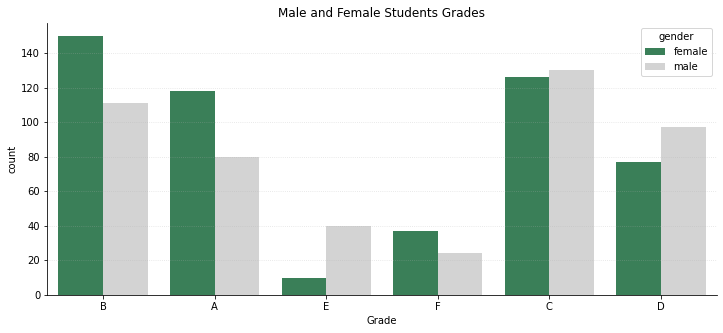

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
sns.countplot(x='Grade',hue='gender',data=data,palette=color_map)
ax.set_title('Male and Female Students Grades')
ax.grid(axis='y',linestyle=':',alpha=0.4)
for i in ['top','right']:
    ax.spines[i].set_visible(False)

**Relationship between grades and lunch**

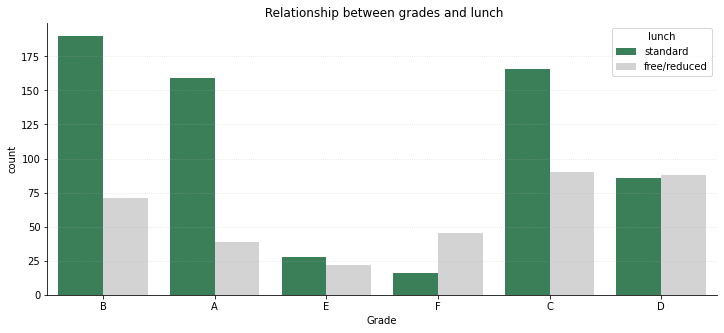

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
sns.countplot(x='Grade',hue='lunch',data=data,palette=color_map)
ax.set_title(' Relationship between grades and lunch')
ax.grid(axis='y',linestyle=':',alpha=0.4)
for i in ['top','right']:
    ax.spines[i].set_visible(False)

**Test Preperation Course and Grades**

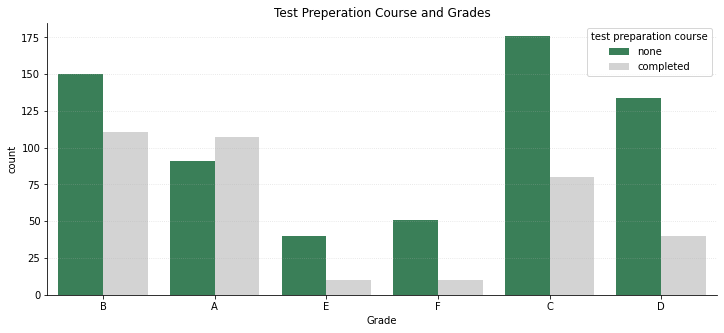

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
sns.countplot(x='Grade',hue='test preparation course',data=data,palette=color_map)
ax.set_title('Test Preperation Course and Grades')
ax.grid(axis='y',linestyle=':',alpha=0.4)
for i in ['top','right']:
    ax.spines[i].set_visible(False)

**Creating dummy variables**

We use One-Hot Encoding to encode categorical variables. Encoding is necessary because machine learning models do not work with categorical variables. For One-Hot Encoding we use pd.get_dummies()

In [ ]:
data_dummies = data[['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course']]
data_dummies=pd.get_dummies(data_dummies)
data_dummies.head()

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [ ]:
data_totalmarks=data['total_marks']

**Training the Models**

In [ ]:
# Importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(data_dummies,data_totalmarks,test_size=0.2,random_state=1)

**Evaluating the performance of our regression models.**

In [ ]:
#https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
data_scores=[]
def EvaluatingModels(true_value,predicted_value,model):
    MSE=mean_squared_error(true_value,predicted_value,squared=True) # If squared = True then its MSE, if squared = False then its RMSE
    RMSE=mean_squared_error(true_value,predicted_value,squared=False)
    MAE= mean_absolute_error(true_value,predicted_value)
    R_Squared = r2_score(true_value,predicted_value)
    data_scores.append([model,MSE,RMSE,MAE,R_Squared])
    print("MSE:", MSE)
    print("MAE:", MAE)
    print("RMSE:", RMSE)
    print("R-squared:", R_Squared)

R squared : Measures how much of variability in dependent variable can be explained by the model.

MAE : Gives us the difference between the actual value and predicted value. (Eg: If the actual value is 10000 and the predicted value is 5000, then we can say that the actual value is 5000 more than the predicted value).

MSE : Mean Square Error is an absolute measure of the goodness for the fit.

**Linear Regression**

In [ ]:
linear_regressor=LinearRegression(normalize=True)
linear_regressor.fit(x_train,y_train)
lin_prediction= linear_regressor.predict(x_test)
EvaluatingModels(y_test,lin_prediction,'Linear Regression')

MSE: 1401.35
MAE: 29.57
RMSE: 37.43460965470322
R-squared: 0.26394964719113545


**Decision Tree Regression**

In [ ]:
regress_dtree=DecisionTreeRegressor(random_state=1)
dtree_model = regress_dtree.fit(x_train,y_train)
y_predtree = dtree_model.predict(x_test)
EvaluatingModels(y_test,y_predtree,'Decision Tree Regression')

MSE: 1915.8078343281354
MAE: 34.55811137473637
RMSE: 43.76994213302247
R-squared: -0.006266123645920496


**RandomForest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor=RandomForestRegressor(random_state=1)
rf_model=rf_regressor.fit(x_train,y_train)
y_rfpred = rf_model.predict(x_test)
EvaluatingModels(y_test,y_rfpred,'Random Forest Regression')

MSE: 1789.7594669380162
MAE: 33.35750586883692
RMSE: 42.305548890636274
R-squared: 0.05993999565937691


**Feature Importance Plot for Random Forest**

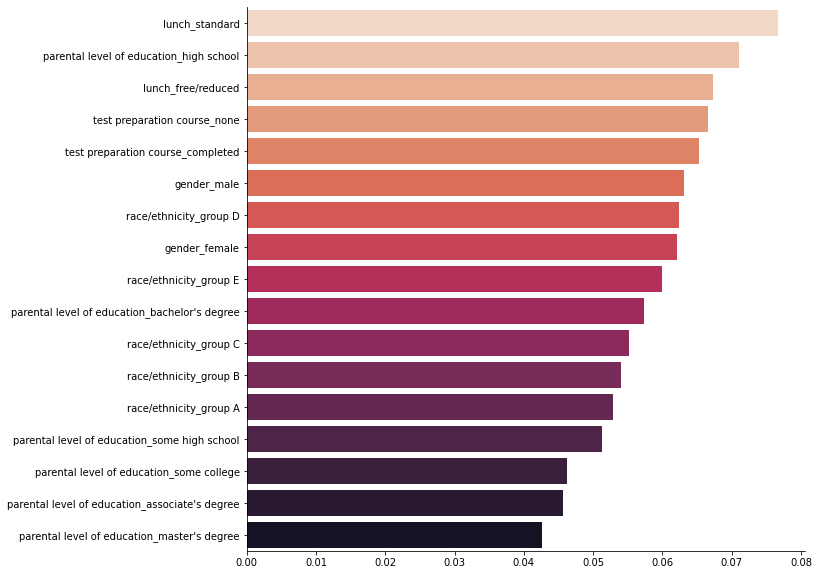

In [ ]:
# https://towardsdatascience.com/running-random-forests-inspect-the-feature-importances-with-this-code-2b00dd72b92e
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x=feature_importances['importance'].values, y= feature_importances['importance'].index,palette='rocket_r')

**Comparing the performance**

In [ ]:
df=pd.DataFrame(data_scores,columns=['Model','MSE','RMSE','MAE','R2'])
df

,Model,MSE,RMSE,MAE,R2
0,Linear Regression,1401.350000,37.434610,29.570000,0.263950
1,Decision Tree Regression,1915.807834,43.769942,34.558111,-0.006266
2,Random Forest Regression,1789.759467,42.305549,33.357506,0.059940


If we compare the three models we used for predictions. We can observe that:

1. Linear regression performed far better than Decision Trees and Random Forest algorithms. <br>
2. The Mean Square Error value of Linear Regression is 1436 (on average the predictions have 1436 difference from the actual values). <br>
3. The R squared value of Decision Tree Regression is negative. R-squared values less than 0 means a horizontal line fits the data better than our model.  So, decision tree regression is not suitable for our data. <br>
4. Random Forest performs better than Decision Trees but not as good as Linear Regression. <br>
5. Even though Linear Regression performs better than these models, the r_squared value is only 0.24 and the predictions are not accurate most of the time. <br>